Ce notebook contient des analyses des images de la banque d'image.

On va d'abord dans un premier cas récupérer la dimension des images

In [21]:
import os, sys
from PIL import Image

imgfile = Image.open("data/images/1551.jpg")
print(imgfile.size, imgfile.format)

(60, 80) JPEG


Nous allons analyser tous les pixels de notre images qui est de dimension 60 par 80

In [27]:
imgfile = Image.open("data/images/1551.jpg")
data = imgfile.getdata()
for i in range(60):
    for j in range(80):
        print(i, j, data.getpixel((i, j)))

0 0 (195, 192, 187)
0 1 (195, 192, 187)
0 2 (195, 192, 187)
0 3 (195, 192, 187)
0 4 (195, 192, 187)
0 5 (195, 192, 187)
0 6 (195, 192, 187)
0 7 (195, 192, 187)
0 8 (194, 191, 186)
0 9 (194, 191, 186)
0 10 (195, 192, 187)
0 11 (195, 192, 187)
0 12 (196, 193, 188)
0 13 (197, 194, 189)
0 14 (198, 195, 190)
0 15 (198, 195, 188)
0 16 (196, 197, 183)
0 17 (195, 197, 183)
0 18 (196, 196, 184)
0 19 (197, 197, 189)
0 20 (199, 196, 191)
0 21 (199, 195, 194)
0 22 (201, 195, 197)
0 23 (201, 195, 197)
0 24 (204, 195, 198)
0 25 (204, 195, 196)
0 26 (204, 196, 193)
0 27 (205, 198, 190)
0 28 (205, 199, 185)
0 29 (205, 200, 181)
0 30 (206, 201, 181)
0 31 (204, 201, 184)
0 32 (206, 207, 202)
0 33 (198, 209, 215)
0 34 (187, 210, 228)
0 35 (186, 207, 224)
0 36 (197, 202, 205)
0 37 (207, 200, 190)
0 38 (216, 199, 181)
0 39 (216, 203, 186)
0 40 (195, 197, 192)
0 41 (191, 200, 197)
0 42 (196, 199, 192)
0 43 (204, 198, 184)
0 44 (213, 197, 172)
0 45 (211, 199, 177)
0 46 (197, 204, 196)
0 47 (195, 206, 202)
0 

On va en extraire les informations EXIF

In [23]:
from PIL.ExifTags import TAGS

imgfile = Image.open("data/images/1551.jpg")
exif_data = imgfile._getexif()

if exif_data:  # s'il existe des informations EXIF
    for tag, value in exif_data.items():
        if tag in TAGS:
            print(TAGS[tag], value)

Cependant comme le montre le résultat nous n'avons pas d'information EXIF sur cette image, essayons sur une autre image

In [28]:
from PIL.ExifTags import TAGS

imgfile = Image.open("data/images/1624.jpg")
exif_data = imgfile._getexif()

if exif_data:  # s'il existe des informations EXIF
    for tag, value in exif_data.items():
        if tag in TAGS:
            print(TAGS[tag], value)

ColorSpace 65535
ExifImageWidth 1080
ExifImageHeight 1440
ResolutionUnit 2
ExifOffset 164
Software Adobe Photoshop CS4 Windows
Orientation 1
DateTime 2011:11:30 12:32:51
XResolution (72, 1)
YResolution (72, 1)


Nous allons afficher un histogramme des couleurs de notre image, dans un premier cas nous aurons 3 graphiques pour représenter le format RGD indépendament des uns autres et ensuite une superposition des 3 spectres.

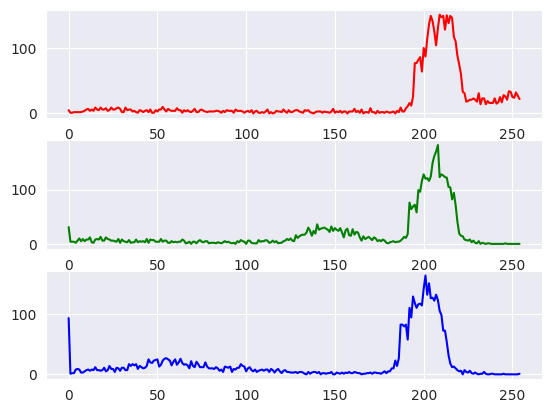

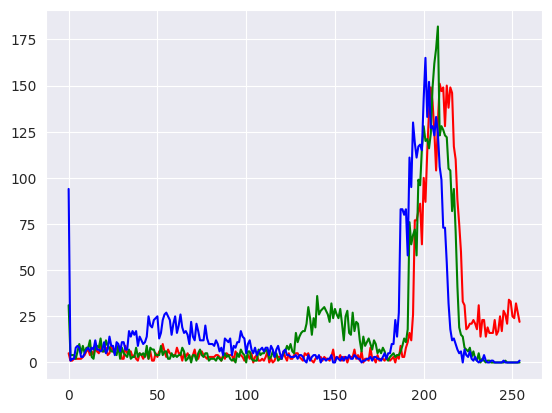

In [24]:
import matplotlib.pyplot as plot

imgfile = Image.open("data/images/1551.jpg")
histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color="red")
axis2.plot(green, color="green")
axis3.plot(blue, color="blue")
plot.show()
#For displaying on one graph
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
plot.plot(x, y)
plot.show()

Nous allons utiliser un algorithme de regroupement KMeans pour en retirer les 4 couleurs prédominantes dans notre image.

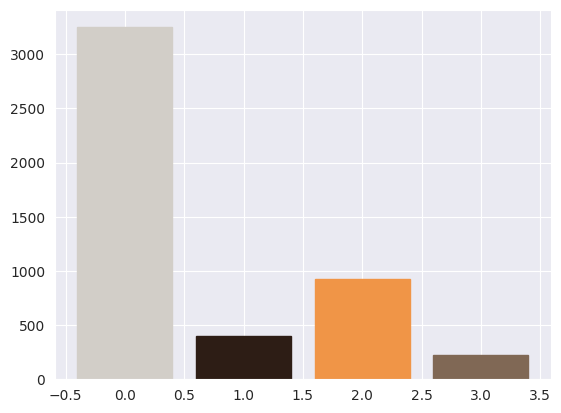

In [25]:
import math
import numpy
from sklearn.cluster import KMeans

imgfile = Image.open("data/images/1551.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()

Pour aller plus loin nous allons afficher des clusters supplémentaires et analyser le temps pris par chacun des algorithmes.

In [36]:
import numpy as np
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

data = pd.read_csv("data/styles.csv")
le = LabelEncoder()
dataframe = dataframe.astype(
    dtype={"year": "<i4", "genre": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "genre"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["genre"], c=colors[clusters.labels_]
)
plot.show()

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'year' not found in columns."

Nous allons comparer les 2 algorithmes, KMeans et MiniBatchKMeans, nous allons mettre en évidence le temps pris par chacun des algorithmes.
Commençons avec KMeans

Total time:  1 : 0.2871057987213135
Total time:  2 : 0.4786841869354248
Total time:  3 : 0.251528263092041
Total time:  4 : 0.23795652389526367
Total time:  5 : 0.21574759483337402
Total time:  6 : 0.2554962635040283
Total time:  7 : 0.2903106212615967
Total time:  8 : 0.26372289657592773
Total time:  9 : 0.2085881233215332
Total time:  10 : 0.26265764236450195
Total time:  11 : 0.4338719844818115
Total time:  12 : 0.33491039276123047
Total time:  13 : 0.21328949928283691
Total time:  14 : 0.2616581916809082
Total time:  15 : 0.21414589881896973
Total time:  16 : 0.24741554260253906
Total time:  17 : 0.21504831314086914
Total time:  18 : 0.2516767978668213
Total time:  19 : 0.24710392951965332


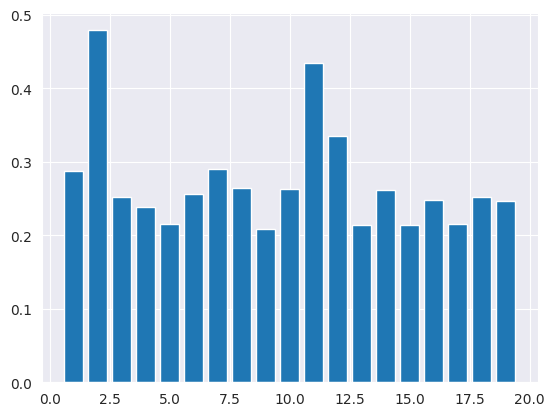

In [37]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("data/images/1551.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Procédons à MiniBatchKMeans

Total time:  1 : 1.560929536819458
Total time:  2 : 0.2782726287841797
Total time:  3 : 2.2126927375793457
Total time:  4 : 0.2903482913970947
Total time:  5 : 3.6250369548797607
Total time:  6 : 0.20032906532287598
Total time:  7 : 0.4231748580932617
Total time:  8 : 0.2988734245300293
Total time:  9 : 0.2848544120788574
Total time:  10 : 0.2129528522491455
Total time:  11 : 0.2131948471069336
Total time:  12 : 0.18775129318237305
Total time:  13 : 0.21095871925354004
Total time:  14 : 0.45091772079467773
Total time:  15 : 0.5706639289855957
Total time:  16 : 0.22437071800231934
Total time:  17 : 0.4853348731994629
Total time:  18 : 0.40961575508117676
Total time:  19 : 0.4470977783203125


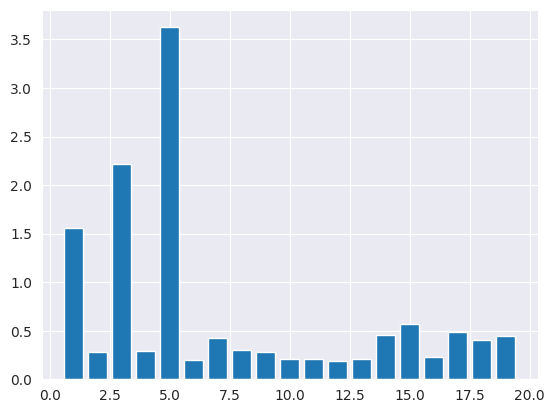

In [38]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("data/images/1551.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

On constate que l'algorithme miniBatchKMeans nécessite plus de temps pour le traitement de l'image

Désormais, nous allons afficher comment les valeurs des pixels individuels ont été regroupés.

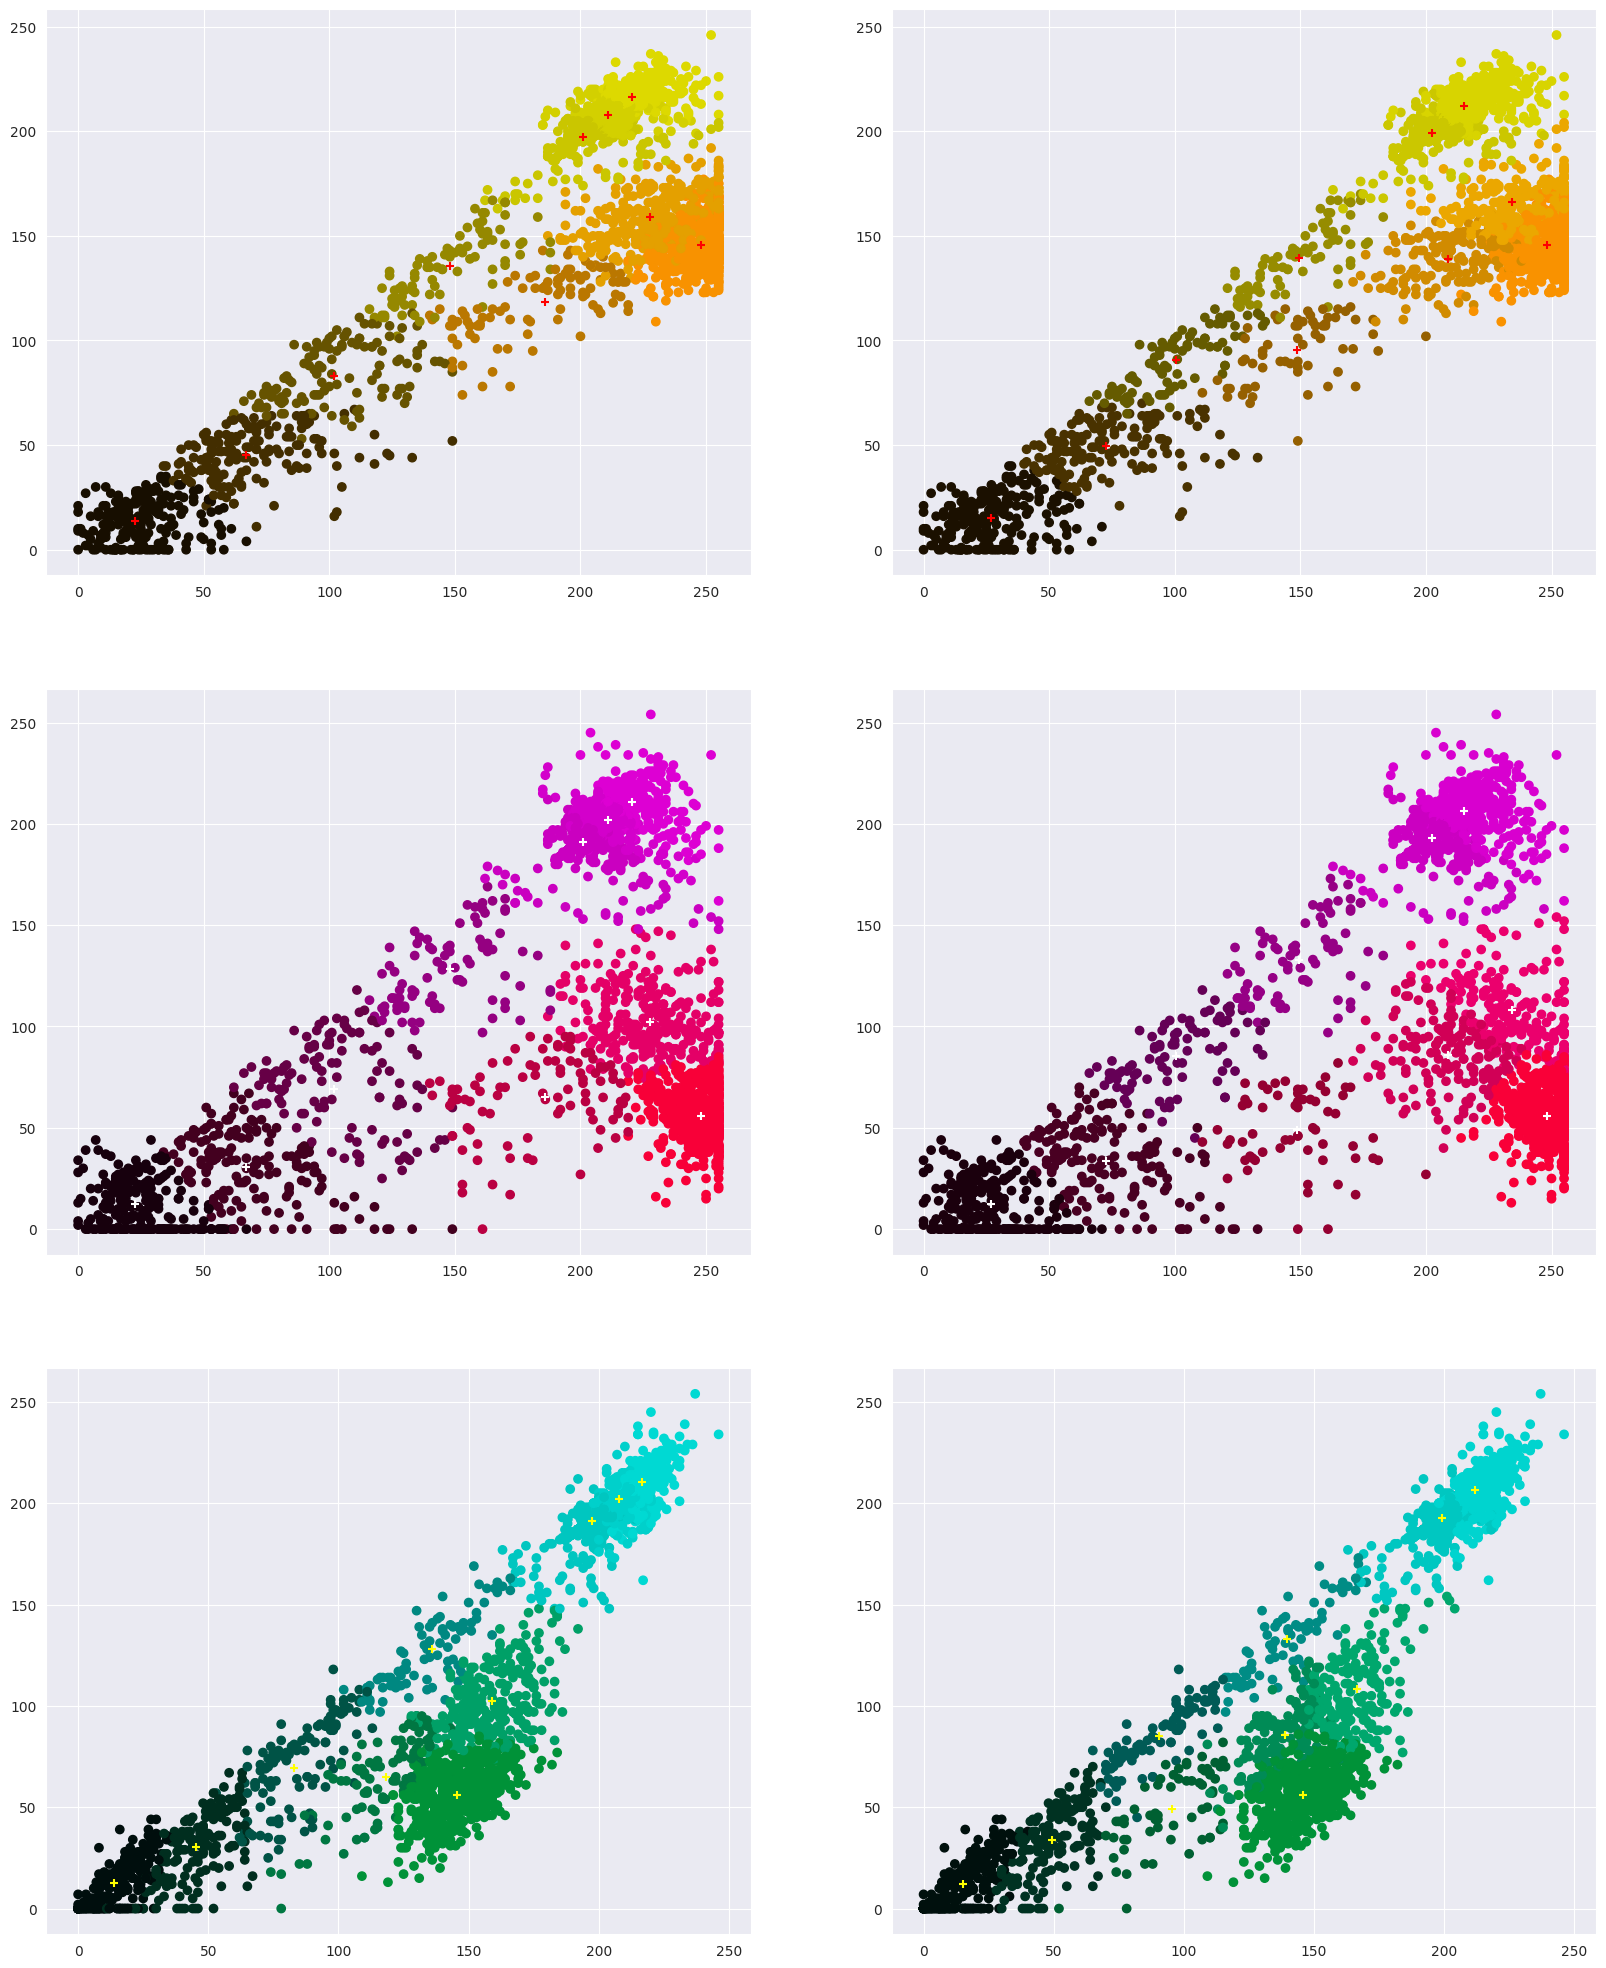

In [26]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("data/images/1551.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

On peut constater que la génération des pixels avec l'algorithme de KMeans et de MiniBatchKMeans sont sensiblement équivalents.